<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Content**



1.   Import Nessary Library
2.   Read Data
3.   Preprocessing
4.   Data Transformation
5.   Handling missing Value
6.   Standardizing data
7.   Data spliting
8.   Build model
9.   References



# **1- Import Nessary library**

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **2- Read Data**

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ba3212b63af0fc8695d7bcefd446af37755490d7ba2b31ad211c4b39fa56bcec
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!rm markets.csv
!wget https://raw.githubusercontent.com/hussain0048/Projects-/master/stock_data.csv -O stock_data.csv

df = pd.read_csv("stock_data.csv", sep=",", header=0)

rm: cannot remove 'markets.csv': No such file or directory
--2024-04-20 03:25:53--  https://raw.githubusercontent.com/hussain0048/Projects-/master/stock_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1185839 (1.1M) [text/plain]
Saving to: ‘stock_data.csv’

stock_data.csv      100%[===================>]   1.13M  --.-KB/s    in 0.05s   

2024-04-20 03:25:54 (21.7 MB/s) - ‘stock_data.csv’ saved [1185839/1185839]



# **3- Preprocessing**

In [4]:
cols = [1,2,3,4,5,7]

In [5]:
df = df[df.columns[cols]]

In [ ]:
df

,Open,High,Low,Close,Volume,Stock
0,0.42388,0.42902,0.41874,0.42388,23220030,AAPL
1,0.42388,0.42516,0.41366,0.42134,18022532,AAPL
2,0.42516,0.43668,0.42516,0.42902,42498199,AAPL
3,0.42902,0.43157,0.41618,0.41618,37125801,AAPL
4,0.43927,0.44052,0.43927,0.43927,57822062,AAPL
...,...,...,...,...,...,...
19581,178.56000,180.45000,178.31000,180.17000,13275578,FB
19582,180.50000,180.74800,179.40300,180.25000,12903836,FB
19583,179.79000,180.35000,179.11000,179.56000,10467606,FB
19584,178.31000,179.40000,177.09000,179.30000,12602188,FB


In [6]:
X=df.drop(columns=['Close'])

In [7]:
X

,Open,High,Low,Volume,Stock
0,0.42388,0.42902,0.41874,23220030,AAPL
1,0.42388,0.42516,0.41366,18022532,AAPL
2,0.42516,0.43668,0.42516,42498199,AAPL
3,0.42902,0.43157,0.41618,37125801,AAPL
4,0.43927,0.44052,0.43927,57822062,AAPL
...,...,...,...,...,...
19581,178.56000,180.45000,178.31000,13275578,FB
19582,180.50000,180.74800,179.40300,12903836,FB
19583,179.79000,180.35000,179.11000,10467606,FB
19584,178.31000,179.40000,177.09000,12602188,FB


In [8]:
cols = [3]
Y = df[df.columns[cols]]

In [9]:
Y

,Close
0,0.42388
1,0.42134
2,0.42902
3,0.41618
4,0.43927
...,...
19581,180.17000
19582,180.25000
19583,179.56000
19584,179.30000


In [10]:

X.select_dtypes(include=['object']).columns

Index(['Stock'], dtype='object')

In [11]:
X

,Open,High,Low,Volume,Stock
0,0.42388,0.42902,0.41874,23220030,AAPL
1,0.42388,0.42516,0.41366,18022532,AAPL
2,0.42516,0.43668,0.42516,42498199,AAPL
3,0.42902,0.43157,0.41618,37125801,AAPL
4,0.43927,0.44052,0.43927,57822062,AAPL
...,...,...,...,...,...
19581,178.56000,180.45000,178.31000,13275578,FB
19582,180.50000,180.74800,179.40300,12903836,FB
19583,179.79000,180.35000,179.11000,10467606,FB
19584,178.31000,179.40000,177.09000,12602188,FB


In [12]:
X['Stock'] = X['Stock'].fillna(X['Stock'].mode()[0])

# **4- Data Transformation**

In [13]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in X.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X[col] = lencoders[col].fit_transform(X[col])

In [ ]:
X

,Open,High,Low,Volume,Stock
0,0.42388,0.42902,0.41874,23220030,0
1,0.42388,0.42516,0.41366,18022532,0
2,0.42516,0.43668,0.42516,42498199,0
3,0.42902,0.43157,0.41618,37125801,0
4,0.43927,0.44052,0.43927,57822062,0
...,...,...,...,...,...
19581,178.56000,180.45000,178.31000,13275578,1
19582,180.50000,180.74800,179.40300,12903836,1
19583,179.79000,180.35000,179.11000,10467606,1
19584,178.31000,179.40000,177.09000,12602188,1


# 5- **Handling Missing Values**

This code performs multiple imputation by chained equations (MICE) to handle missing values in a dataset.

In [14]:
import warnings# This imports the Python module for handling warnings.
warnings.filterwarnings("ignore")# This line ignores any warnings that might be raised during the execution of the code.
# Multiple Imputation by Chained Equations
# This line enables the experimental version of the iterative imputer in the scikit-learn library.
# Iterative imputation is a technique for imputing missing values by modeling each feature with missing values as a function of other features.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = X.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(X)

In [15]:
MiceImputed

,Open,High,Low,Volume,Stock
0,0.42388,0.42902,0.41874,23220030,0
1,0.42388,0.42516,0.41366,18022532,0
2,0.42516,0.43668,0.42516,42498199,0
3,0.42902,0.43157,0.41618,37125801,0
4,0.43927,0.44052,0.43927,57822062,0
...,...,...,...,...,...
19581,178.56000,180.45000,178.31000,13275578,1
19582,180.50000,180.74800,179.40300,12903836,1
19583,179.79000,180.35000,179.11000,10467606,1
19584,178.31000,179.40000,177.09000,12602188,1


In [ ]:
X=MiceImputed

# **5-Standardizing data**

In [16]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [ ]:
modified_data


,Open,High,Low,Volume,Stock
0,0.000923,0.000929,0.000927,0.011219,0.000000
1,0.000923,0.000919,0.000913,0.008708,0.000000
2,0.000926,0.000948,0.000944,0.020533,0.000000
3,0.000936,0.000935,0.000920,0.017937,0.000000
4,0.000962,0.000958,0.000981,0.027936,0.000000
...,...,...,...,...,...
19581,0.461672,0.463063,0.469953,0.006414,0.333333
19582,0.466689,0.463828,0.472835,0.006234,0.333333
19583,0.464853,0.462806,0.472062,0.005057,0.333333
19584,0.461025,0.460367,0.466737,0.006089,0.333333


# **6-Data Spliiting**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(modified_data, Y, test_size=0.30, random_state=100)


# **7- Build Model**

In [18]:
learner = LinearRegression() #initializing linear regression model
learner.fit(X_train,y_train) #training the linear regression model
score=learner.score(X_test,y_test)#testing the linear regression model


In [ ]:
score

0.9999142675478361

# **8- Polynomial model**

In [46]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [47]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)  # We choose a polynomial of degree 2
X_train_poly = poly_features.fit_transform(X_train)


In [48]:
# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [49]:
# Evaluate the model on the testing set
X_test_poly = poly_features.transform(X_test)
y_pred = poly_reg.predict(X_test_poly)

In [50]:
# Calculate the R^2 score
score = r2_score(y_test, y_pred)
print("R^2 Score:", score)

R^2 Score: 0.9999134124444284


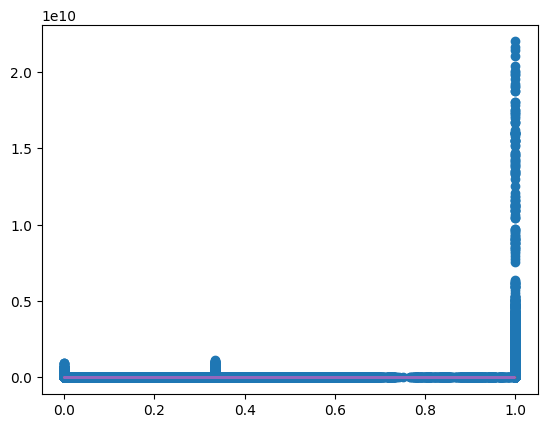

In [56]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train_poly)
plt.plot(X_train, poly_reg.predict(X_train_poly))



# **References**



1.   [Stock Price Prediction using Machine Learning](https://thecleverprogrammer.com/2020/11/14/stock-price-prediction-using-machine-learning/)

